In [3]:
import os
import logging
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.animation import ArtistAnimation, FuncAnimation
from tqdm import tqdm
os.chdir("../")

from datasets import CubeObstacle, CylinderObstacle
from utils.config import Hyperparameters as hparams
from utils.tools import calc_sig_strength, calc_sig_strength_gpu

np.random.seed(52)
logging.basicConfig(level=logging.INFO)

In [4]:
obstacle_ls = [
    CubeObstacle(-30, 15, 35, 60, 20, 0.3),
    CubeObstacle(-30, -25, 45, 10, 35, 0.3),
    CylinderObstacle(0, -30, 70, 10, 0.3)
]

<Figure size 3000x3000 with 0 Axes>

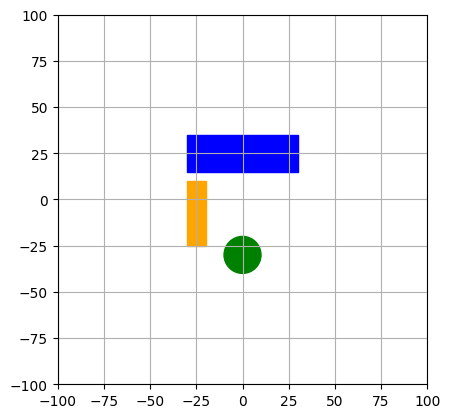

In [28]:
import matplotlib.patches as patches

plt.figure(figsize=(30, 30))
fig, ax = plt.subplots()
ax.grid(True)
ax.set_xlim(-100, 100)
ax.set_ylim(-100, 100)
ax.set_aspect('equal')

ax.add_patch(patches.Rectangle((-30, 15), 60, 20, fill=True, color='blue'))
ax.add_patch(patches.Rectangle((-30, -25), 10, 35, fill=True, color='orange'))
ax.add_patch(patches.Circle((0, -30), 10, fill=True, color='green'))

plt.show()


# Train Loss Plot

In [13]:
usvl_df = pd.read_csv("results/data/unsupervisedLearning_trainLoss.csv")
svl_df = pd.read_csv("results/data/supervisedLearning_trainLoss.csv")

usvl = usvl_df[["Step", "UnsupervisedLearning1 - Loss/train"]]
usvl = usvl.rename(columns={"UnsupervisedLearning1 - Loss/train": "Loss", "Step": "epoch"})
svl = svl_df[["Step", "SupervisedLearning_1 - Loss/train"]]
svl = svl.rename(columns={"SupervisedLearning_1 - Loss/train": "Loss", "Step": "epoch"})

In [ ]:
svl.head()

,epoch,Loss
0,0,0.015751
1,1,0.009628
2,2,0.008861
3,3,0.008460
4,4,0.008200
...,...,...
7995,7995,0.003667
7996,7996,0.003671
7997,7997,0.003664
7998,7998,0.003665


In [15]:
usvl.head()

,epoch,Loss
0,0,-12.444991
1,1,-12.453409
2,2,-12.569438
3,3,-12.622473
4,4,-12.646924


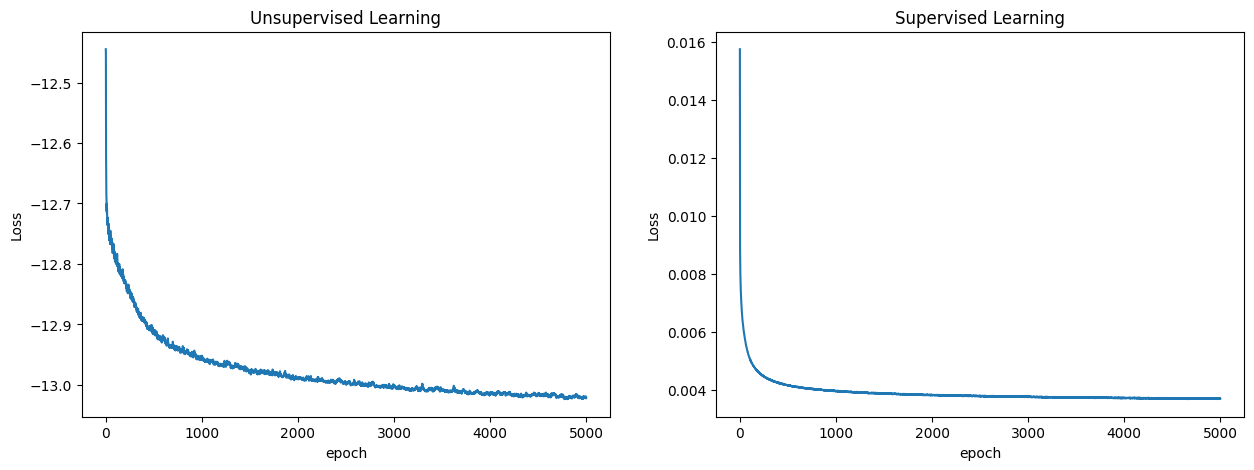

In [20]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.lineplot(data=usvl.head(5000), x="epoch", y="Loss")
plt.title("Unsupervised Learning")

plt.subplot(1, 2, 2)
sns.lineplot(data=svl.head(5000), x="epoch", y="Loss")
plt.title("Supervised Learning")

plt.show()